In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load Dataset
df = pd.read_csv("/kaggle/input/gdp-data/gdp.csv")

# 2. Preprocessing
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df['Value'] = df['Value'].astype(float)

In [74]:
latest_year = df['Year'].max()
latest_gdp = df[df['Year'] == latest_year].sort_values(by='Value', ascending=False)


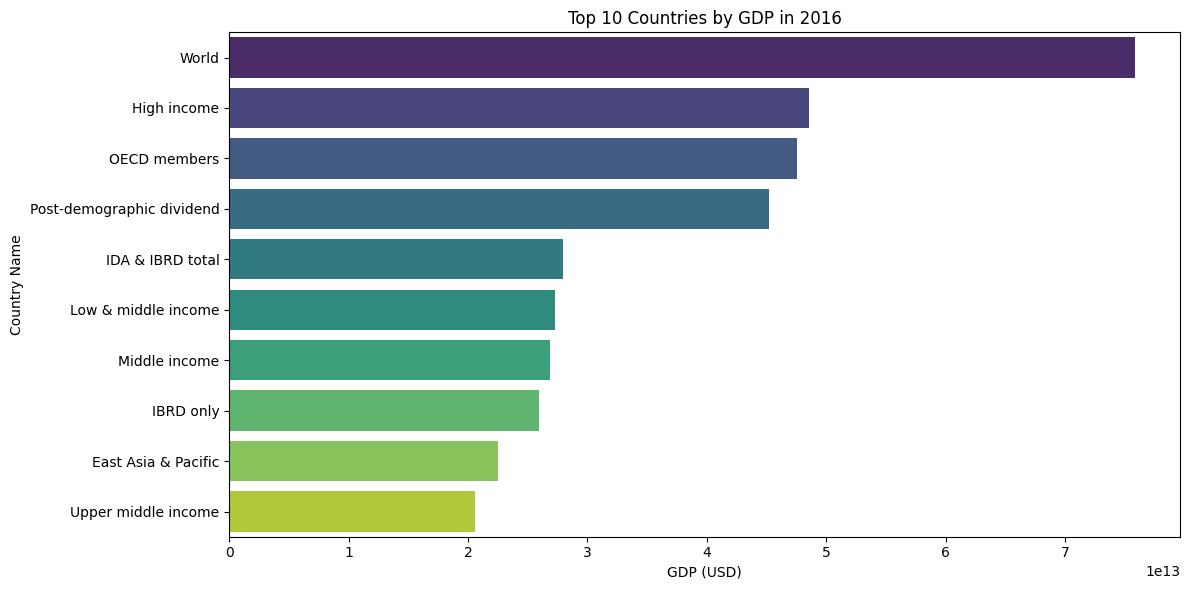

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(data=latest_gdp.head(10), x='Value', y='Country Name', palette='viridis')
plt.title(f"Top 10 Countries by GDP in {latest_year}")
plt.xlabel("GDP (USD)")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


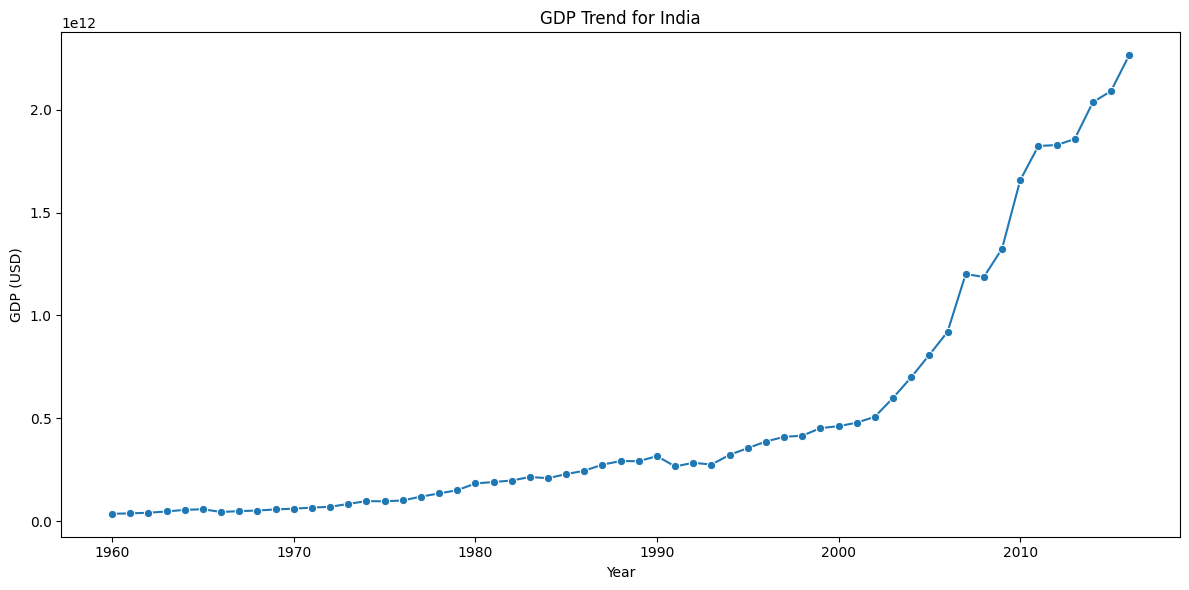

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

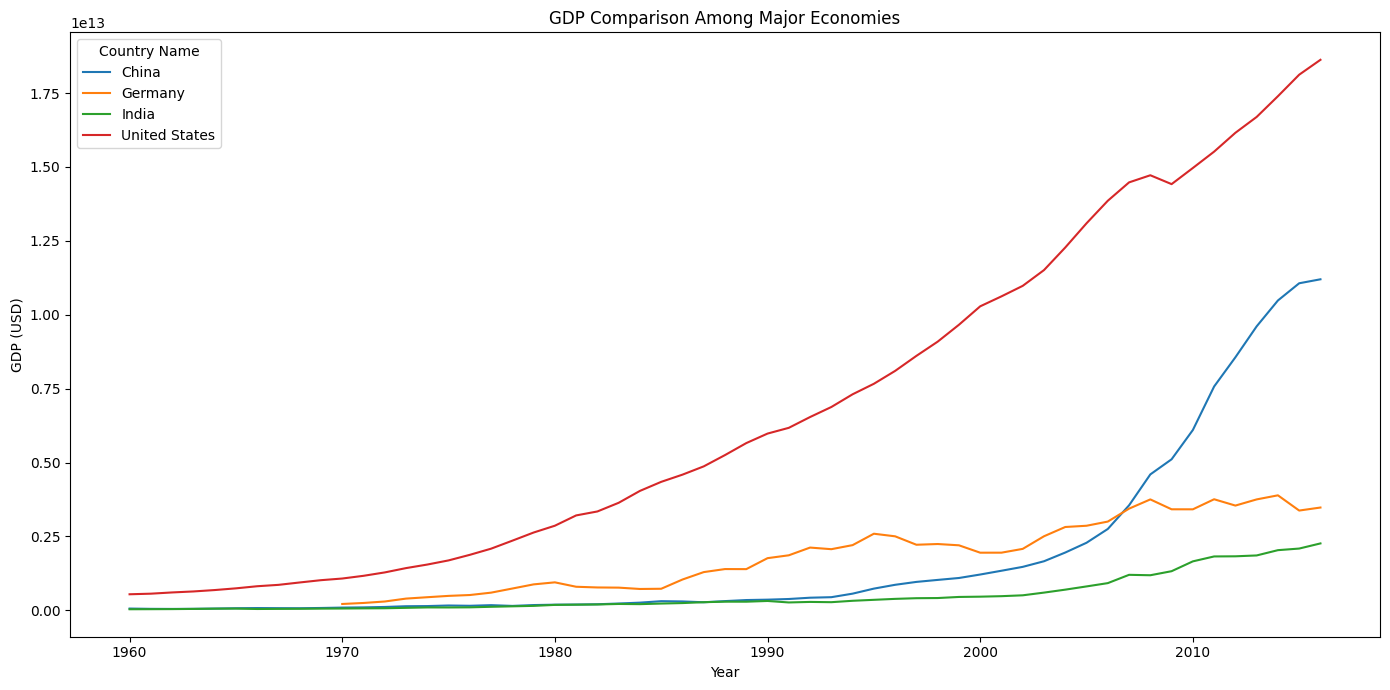

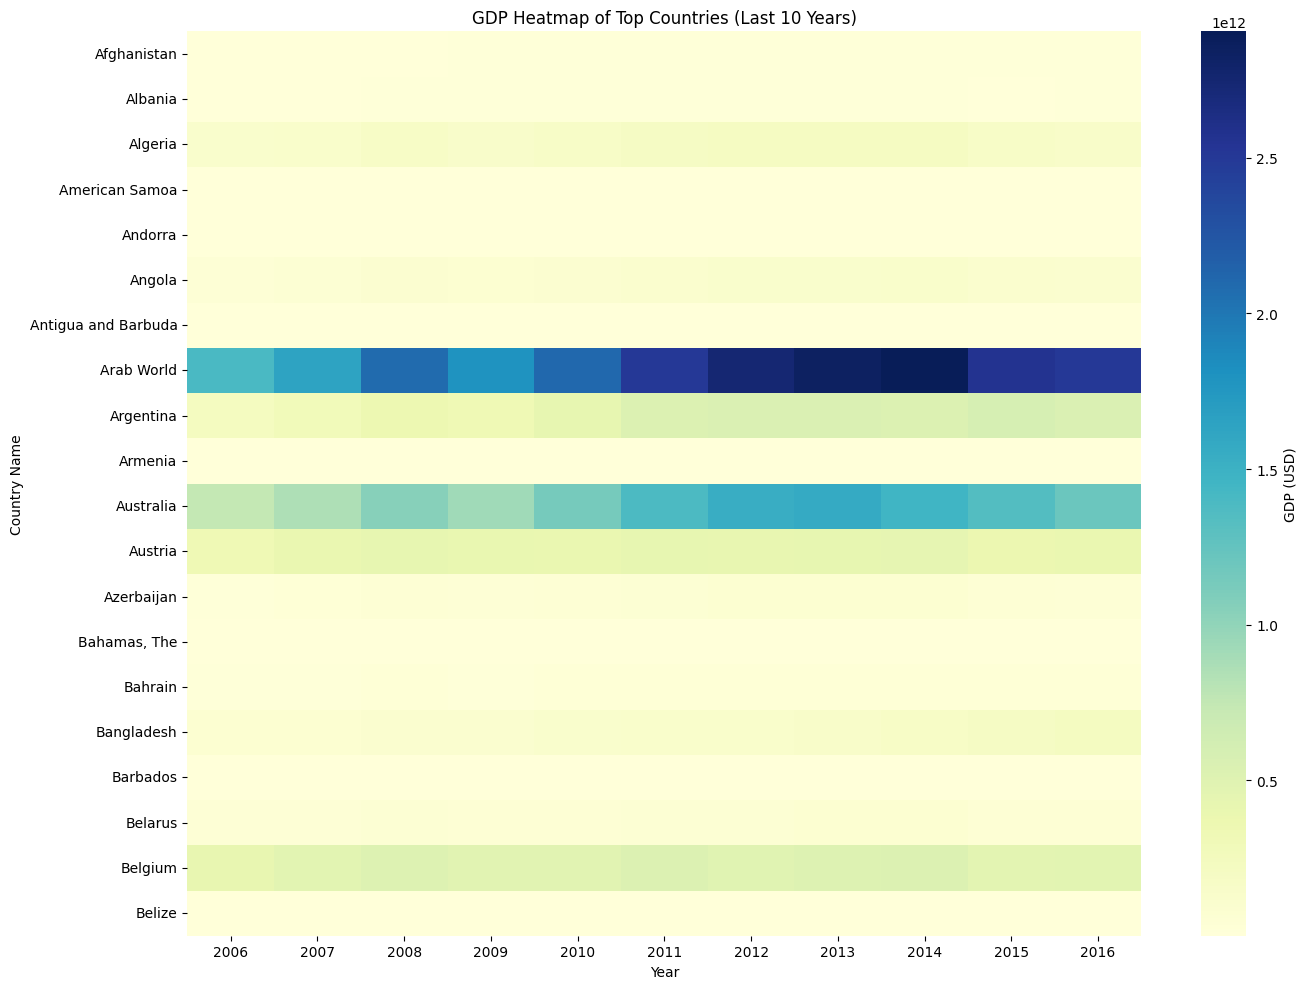

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


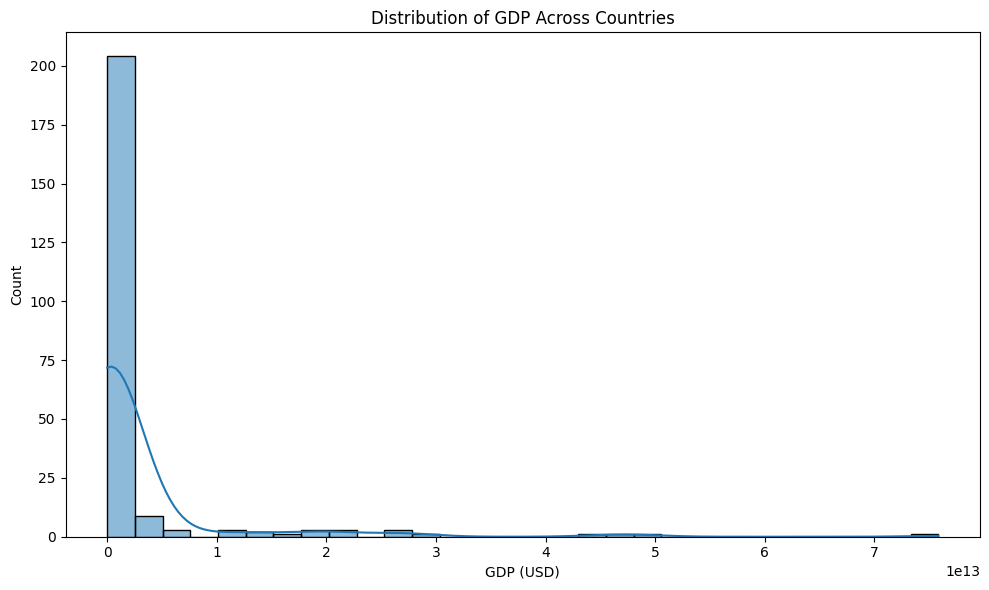

No countries found with consistent GDP decline.


In [76]:

# 5. GDP Trend for Selected Country
country = 'India'
india_gdp = df[df['Country Name'] == country]

plt.figure(figsize=(12,6))
sns.lineplot(data=india_gdp, x='Year', y='Value', marker='o')
plt.title(f"GDP Trend for {country}")
plt.ylabel("GDP (USD)")
plt.tight_layout()
plt.show()

# 6. GDP Growth Rate Calculation
df_sorted = df.sort_values(by=['Country Name', 'Year'])
df_sorted['GDP Growth %'] = df_sorted.groupby('Country Name')['Value'].pct_change() * 100

# 7. Compare GDP of Selected Countries
countries = ['United States', 'China', 'India', 'Germany']
multi_df = df[df['Country Name'].isin(countries)]

plt.figure(figsize=(14,7))
sns.lineplot(data=multi_df, x='Year', y='Value', hue='Country Name')
plt.title("GDP Comparison Among Major Economies")
plt.ylabel("GDP (USD)")
plt.tight_layout()
plt.show()

# 8. Heatmap: GDP Values (Recent 10 Years)
recent = df[df['Year'] >= latest_year - 10]
pivot = recent.pivot(index='Country Name', columns='Year', values='Value').dropna()
plt.figure(figsize=(14,10))
sns.heatmap(pivot.head(20), cmap='YlGnBu', annot=False, cbar_kws={'label': 'GDP (USD)'})
plt.title("GDP Heatmap of Top Countries (Last 10 Years)")
plt.tight_layout()
plt.show()

# 9. GDP Distribution (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(latest_gdp['Value'], bins=30, kde=True)
plt.title("Distribution of GDP Across Countries")
plt.xlabel("GDP (USD)")
plt.tight_layout()
plt.show()

# 10. Countries with Consistent Decline
def is_declining(g):
    return all(g['Value'].diff().fillna(0) < 0)

declining = df.groupby('Country Name').filter(is_declining)
if not declining.empty:
    print("Countries with consistent GDP decline:\n", declining['Country Name'].unique())
else:
    print("No countries found with consistent GDP decline.")

# Save Cleaned Dataset (Optional)
df.to_csv("gdp_cleaned.csv", index=False)
